In [23]:
%run Data_v2.ipynb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

size = 40
# X,y,info,oryginal_isotherms = get_data(size, x_range_to_cut=0.05, flat=False);
X,y,info,oryginal_isotherms = get_data(size, flat=False);

folder_name = 'images'
image_folder_path = Path(folder_name)
# image_files = [(file.stem, file.suffix) for file in image_folder_path.iterdir() if file.is_file()]

/home/pc/moje/python_projects/adsorbents_isotherms/Data/all_data.csv
oryginal_isotherms: 897
oryginal_bet: 897
oryginal_info: 897 

x_range_to_cut->False, return whole x range
flat=False, returned two dimension data
X (897, 40, 2)
y (897,)
info 897
oryginal_isotherms 897
return: X, y, info, oryginal_isotherms


### example of converting the volume of gas adsorbed to the weight of gas adsorbed:

In [24]:
V_ads = 7.5355 # cm3/g - volume of nitrogen adsorbed per gram of adsorbent
V_molar = 22414 # cm3/mol - molar volume of nitrogen at STP
M_N2 = 28.013 # g/mol   molar mass of nitrogen N2
n = V_ads / V_molar # Convert the volume of nitrogen (cm³) to moles of nitrogen
Mass_of_adsorbed_nitrogen = n * M_N2
Mass_of_adsorbed_nitrogen

0.00941786211742661

### linear regression on the linear portion of the plot ( usually between 0.05 < P/P0 < 0.35 )

index = 879, sample = K1, BETsurface = 1426.0
index = 880, sample = K2, BETsurface = 2897.0
index = 881, sample = K3, BETsurface = 3283.0
index = 882, sample = Na1, BETsurface = 1961.0

For Data156: Smaple name=Na1, Graph number=1, isotherm_type=I BET=1961.0
slope s = 1.9017094085823347 
intercept i = -0.015302906076622325 
weight of monolayer [g] Wm = 0.5301084356270511 
BET constant C = -123.27112857259867 
Avogadro number N = 6.023e+23 
Adsorbate cross sectional area Acs = 1.62e-19 
Molecular weight of Adsorbate M = 28.0134
Slope(współczynnik kierunkowy)=1.9017094085823347 
Intercept(wyraz wolny) =-0.015302906076622325 
r_value=0.9977325287810931 
p_value=1.2647167272602012e-16 
std_err=0.035579341800592135
Total Surface area St = 1846.4 [m2]  
Specific sur area (from article): 1961.0 [m2/g]


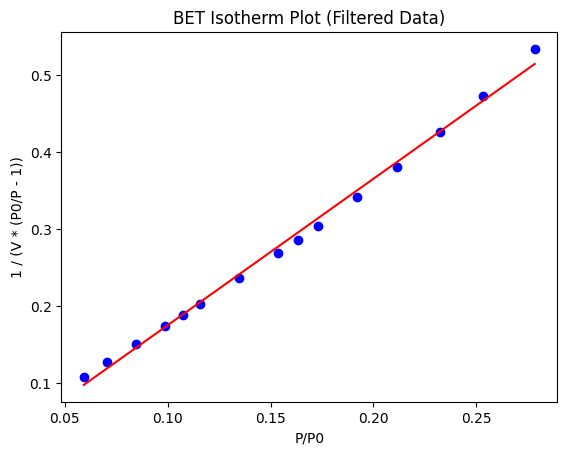

In [26]:
from scipy.stats import linregress
import numpy as np

data_name = 'Data156'
index_of_data = 882

min_x_range = 0.05
max_x_range = 0.3

x_y_v2 = []
for index, isotherm in enumerate(X):
    if(info[index][0] == data_name):
        print(f"index = {index}, sample = {info[index][1]}, BETsurface = {y[index]}")
        
    if(info[index][0] == data_name and index_of_data == index):
        print()
        sample_name = info[index][1]
        graph_number = info[index][2]
        isotherm_type = info[index][3]
        
        print(f'For {data_name}: Smaple name={sample_name}, Graph number={graph_number}, isotherm_type={isotherm_type} BET={y[index]}')
        x_range = 0.1
        
        for i in range(len(isotherm)):
            if(isotherm[i][0] > min_x_range and isotherm[i][0] < max_x_range):
                x_y_v2.append(isotherm[i])
        break
        
x_y = np.array(x_y_v2)
# print(x_y)
P_P0 = x_y[:, 0] # Relative pressure P/P0
volume = x_y[:, 1]
V_molar = 22414 # cm3/mol - molar volume of nitrogen at STP
M_N2 = 28.013 # g/mol   molar mass of nitrogen N2
V = (volume / V_molar) * M_N2
# Calculate the values for column 3: 1 / (Volume * (P0/P - 1))
P0_P = 1 / P_P0  # This gives P0/P for each data point
W = 1/( V * ( P0_P - 1) )

slope, intercept, r_value, p_value, std_err = linregress(P_P0, W) # Perform linear regression to find the slope and intercept

# Add the linear regression line
plt.plot(P_P0, W, 'bo', label="Data Points")
plt.xlabel("P/P0")
plt.ylabel("1 / (V * (P0/P - 1))")
plt.title("BET Isotherm Plot (Filtered Data)")

plt.plot(P_P0, slope * P_P0 + intercept, 'r-', label=f'Linear Fit (slope = {slope:.3f})')

print(f'slope s = {slope} \nintercept i = {intercept} ')

Wm = 1 / (slope + intercept) # weight of monolayer in grams [g]
C = 1 / (intercept * Wm ) # BET constant (C)
N = 6.023e23 # Avogadro's number [molecules/mol]
Acs = 16.2e-20  # Adsorbate cross sectional area (16.2Å^2 for Nitrogen) 1Å^2 = 1×10−20m [m2]
M = 28.0134 # 28.0134 .   Molecular weight of Adsorbate [g/mol]
St = ( (Wm * N * Acs) / M )   # Total Surface area - St [m2]
# specific surface area = St / mass of sample [m2/g]

print(f'weight of monolayer [g] Wm = {Wm} \nBET constant C = {C} \nAvogadro number N = {N} \nAdsorbate cross sectional area Acs = {Acs} \nMolecular weight of Adsorbate M = {M}')

print(f"Slope(współczynnik kierunkowy)={slope} \nIntercept(wyraz wolny) ={intercept} \nr_value={r_value} \np_value={p_value} \nstd_err={std_err}")

print(f'Total Surface area St = {round(St,2)} [m2]  \nSpecific sur area (from article): {y[index]} [m2/g]')